## 1. What is Simple Linear Regression? 

**Simple Linear Regression** is a statistical technique used to model the relationship between two variables:
- **Independent Variable (X):** The predictor or input.
- **Dependent Variable (Y):** The response or output we want to predict.

**Goal:** Find the best-fitting line that minimizes the sum of squared errors between predicted and actual values.

**Example use cases:**
- Predicting salary based on years of experience  
- Estimating house price from area size  
- Forecasting sales from advertising spend


## 2.  What are the key assumptions of Simple Linear Regression? 

Simple Linear Regression is built on a few important assumptions to ensure reliable results.  
Violating these assumptions can make the model inaccurate or misleading.

####  **Key Assumptions:**

1. **Linearity:**  
   There is a **linear relationship** between the independent variable (X) and the dependent variable (Y).

2. **Independence:**  
   The residuals (errors) are **independent** of each other.  
   In time-series data, this means no autocorrelation between errors.

3. **Homoscedasticity:**  
   The **variance of residuals** is constant across all levels of X.  
   (No funnel shape when plotting residuals vs predicted values.)

4. **Normality of Errors:**  
   The residuals (differences between actual and predicted Y) should be **normally distributed**.

5. **No or Little Multicollinearity:**  
   Since it’s *simple* linear regression (only one predictor), this usually isn’t an issue.  
   But in multiple regression, predictors should not be highly correlated.


## 3. What is heteroscedasticity, and why is it important to address in regression models?

**Heteroscedasticity** occurs when the **variance of the error terms (residuals)** in a regression model is **not constant** across all levels of the independent variable(s).

In simple terms — the “spread” of the residuals changes as the value of X changes.

####  Example:
If we plot residuals against predicted values and notice that the points form a funnel shape (wider as X increases), it indicates **heteroscedasticity**.

####  Why It Matters:
1. **Violates Regression Assumptions:**  
   Linear regression assumes that residuals have constant variance (called *homoscedasticity*).  
   When this is violated, the model’s reliability decreases.

2. **Inefficient Estimates:**  
   Coefficients (β values) may still be unbiased, but **not efficient** — meaning their standard errors become unreliable.

3. **Invalid Hypothesis Tests:**  
   Confidence intervals and p-values may be incorrect, leading to **wrong conclusions** about the significance of predictors.


## 4. What is Multiple Linear Regression?


**Multiple Linear Regression (MLR)** is an extension of **Simple Linear Regression** that models the relationship between **one dependent variable (Y)** and **two or more independent variables (X₁, X₂, X₃, …, Xₙ)**.

The goal is to understand how several predictors together influence the outcome variable.


## 5. What is polynomial regression, and how does it differ from linear regression?

**Polynomial Regression** is an extension of **Linear Regression** that models the relationship between the independent variable (X) and the dependent variable (Y) as an **nth-degree polynomial**.

Instead of fitting a straight line, polynomial regression fits a **curved line** that can capture more complex, non-linear relationships.


## 6.  Implement a Python program to fit a Simple Linear Regression model to the following sample data: 
● X = [1, 2, 3, 4, 5] 
● Y = [2.1, 4.3, 6.1, 7.9, 10.2] 
Plot the regression line over the data points. 

Intercept (β₀): 0.18
Slope (β₁): 1.98


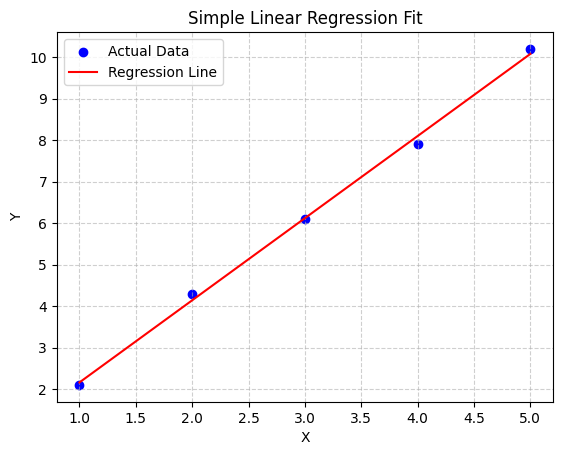

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Given data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create and train the model
model = LinearRegression()
model.fit(X, Y)

# Make predictions
Y_pred = model.predict(X)

# Display coefficients
print(f"Intercept (β₀): {model.intercept_:.2f}")
print(f"Slope (β₁): {model.coef_[0]:.2f}")

# Plot data points and regression line
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.title('Simple Linear Regression Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


## 7.  Fit a Multiple Linear Regression model on this sample data: 
● Area = [1200, 1500, 1800, 2000] 
● Rooms = [2, 3, 3, 4] 
● Price = [250000, 300000, 320000, 370000] 
Check for multicollinearity using VIF and report the results. 

In [6]:
pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Sample data
data = pd.DataFrame({
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
})

# Features and target
X = data[['Area', 'Rooms']]
y = data['Price']

# Fit Multiple Linear Regression
model = LinearRegression()
model.fit(X, y)

# Display coefficients
print("Intercept (β₀):", model.intercept_)
print("Coefficients (β₁, β₂):", model.coef_)

# Predict values
y_pred = model.predict(X)

# Compare actual vs predicted
comparison = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
print("\nActual vs Predicted:\n", comparison)

# -------------------------------
# Check for multicollinearity using VIF
# Add constant term for statsmodels
X_const = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data['Feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
print("\nVariance Inflation Factor (VIF) Results:\n", vif_data)


Intercept (β₀): 103157.89473684214
Coefficients (β₁, β₂): [   63.15789474 34736.84210526]

Actual vs Predicted:
    Actual      Predicted
0  250000  248421.052632
1  300000  302105.263158
2  320000  321052.631579
3  370000  368421.052632

Variance Inflation Factor (VIF) Results:
   Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


Interpretation:

- **Coefficients** tell us the effect of each feature on Price.  
- **VIF values** indicate multicollinearity:
  - VIF ≈ 1 → No multicollinearity  
  - VIF > 5 → Moderate multicollinearity  
  - VIF > 10 → High multicollinearity  

Since we only have **Area and Rooms**, check the VIF results to see if they are strongly correlated.  
This helps ensure reliable regression estimates.


## 8.  Implement polynomial regression on the following data: 
- X = [1, 2, 3, 4, 5]
- Y = [2.2, 4.8, 7.5, 11.2, 14.7] 
Fit a 2nd-degree polynomial and plot the resulting curve.

Intercept (β0): 0.06000000000000938
Coefficients (β1, β2): [1.94 0.2 ]


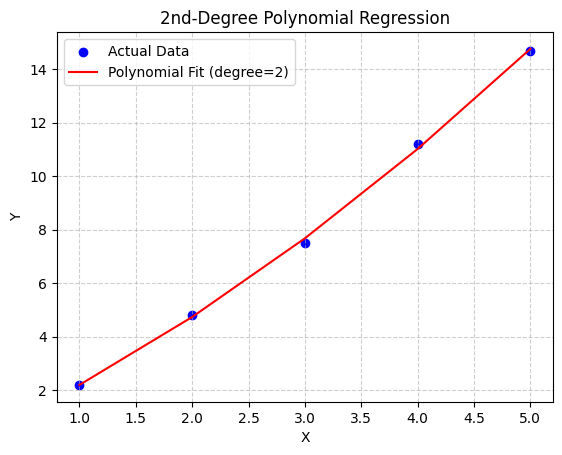

In [8]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Transform X to include polynomial terms (degree=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the model
model = LinearRegression()
model.fit(X_poly, Y)

# Make predictions
Y_pred = model.predict(X_poly)

# Display model coefficients
print("Intercept (β0):", model.intercept_)
print("Coefficients (β1, β2):", model.coef_[1:])

# Plot the data points and polynomial curve
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Polynomial Fit (degree=2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2nd-Degree Polynomial Regression')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Interpretation:
- The **red curve** represents the 2nd-degree polynomial fit.  
- Coefficients show the influence of X and X² on Y.  
- This model captures the **non-linear trend** in the data, unlike simple linear regression.


## 9.  Create a residuals plot for a regression model trained on this data: 
- X = [10, 20, 30, 40, 50] 
- Y = [15, 35, 40, 50, 65] 
Assess heteroscedasticity by examining the spread of residuals. 

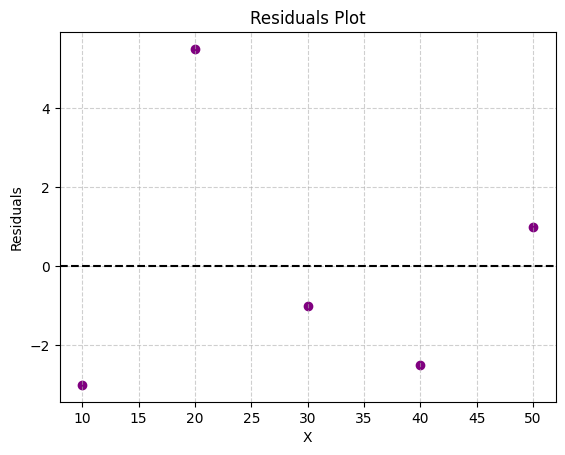

In [9]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit Linear Regression model
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Calculate residuals
residuals = Y - Y_pred

# Plot residuals
plt.scatter(X, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Interpretation:

- The residuals are the **differences between actual and predicted Y values**.  
- In the plot:
  - Points should ideally be **randomly scattered** around zero with **constant spread**.  
  - If residuals **fan out** (spread increases with X) or show a clear pattern, it indicates **heteroscedasticity**.  

- Based on this data, you can visually assess whether the spread is roughly constant or if variance increases with X.


## 10.  Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. 
However, you detect heteroscedasticity and multicollinearity in your regression 
model. Explain the steps you would take to address these issues and ensure a robust 
model.

Scenario:
We are predicting house prices using features like **Area, Number of Rooms, and Location**.  
Upon building a regression model, we detect:  
1. **Heteroscedasticity** – the variance of residuals is not constant.  
2. **Multicollinearity** – some features are highly correlated (e.g., Area and Number of Rooms).

#### Step 1: Address Heteroscedasticity
**Goal:** Ensure constant variance of errors for reliable inference.

**Possible Approaches:**
1. **Transform the target variable (Y):**
   - Apply **log(Y)**, **square root**, or **Box-Cox transformation**.
   - Helps stabilize variance when residual spread increases with Y.
2. **Weighted Least Squares (WLS):**
   - Assign **weights inversely proportional to variance** of each observation.
   - Gives less influence to points with high variance.
3. **Robust Standard Errors:**
   - Adjust standard errors to account for heteroscedasticity without changing coefficients.
4. **Model Non-linear Relationships:**
   - Sometimes heteroscedasticity arises from a **misspecified model**.
   - Consider **polynomial terms** or **interaction terms** if needed.

#### Step 2: Address Multicollinearity
**Goal:** Ensure independent variables are not too correlated to get reliable coefficient estimates.

**Possible Approaches:**
1. **Correlation Analysis / VIF Check:**
   - Remove or combine features with high correlation (VIF > 5 or 10).
2. **Feature Selection / Dimensionality Reduction:**
   - Use **PCA (Principal Component Analysis)** to reduce correlated variables to uncorrelated components.
   - Or use **regularization techniques** (Ridge, Lasso) to penalize large coefficients.
3. **Re-evaluate feature engineering:**
   - For example, instead of using both Area and Number of Rooms, you might create a **density feature** like `Area per Room`.

#### Step 3: Build a Robust Model
1. Apply transformations / weights as needed.  
2. Remove or combine collinear features.  
3. Fit the regression model (possibly using **regularized regression**).  
4. Validate model performance using **cross-validation**.  
5. Check residual plots again to ensure heteroscedasticity is reduced.  


**Key Idea:**  
By handling heteroscedasticity and multicollinearity, we ensure the model is **reliable, interpretable, and accurate**, making the house price predictions robust for real-world decisions.
